# ESC50 : Environment Sound Classification

In [2]:
#import modules we need
#For preprocessing
import numpy as np
import pandas as pd
import os
import sys
import warnings
import math
#For visuavalizations
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
#For extracting features
import librosa
import librosa.display
from tqdm import tqdm
from PIL import Image
from keras.preprocessing.image import img_to_array,array_to_img
#For building deep Learning model
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D,Conv2D
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import SGD
from keras.constraints import maxnorm
import IPython.display as ipd

## About Dataset
<p>The ESC-50 dataset is a labeled collection of 2000 environmental audio recordings suitable for benchmarking methods of environmental sound classification.</p>
<p>The dataset consists of 5-second-long recordings organized into 50 semantical classes (with 40 examples per class) loosely arranged into 5 major categories:</p>


<table>
<thead>
<tr>
<th align="left"><sub>Animals</sub></th>
<th align="left"><sub>Natural soundscapes &amp; water sounds </sub></th>
<th align="left"><sub>Human, non-speech sounds</sub></th>
<th align="left"><sub>Interior/domestic sounds</sub></th>
<th align="left"><sub>Exterior/urban noises</sub></th>
</tr>
</thead>
<tbody>
<tr>
<td align="left"><sub>Dog</sub></td>
<td align="left"><sub>Rain</sub></td>
<td align="left"><sub>Crying baby</sub></td>
<td align="left"><sub>Door knock</sub></td>
<td align="left"><sub>Helicopter</sub></td>
</tr>
<tr>
<td align="left"><sub>Rooster</sub></td>
<td align="left"><sub>Sea waves</sub></td>
<td align="left"><sub>Sneezing</sub></td>
<td align="left"><sub>Mouse click</sub></td>
<td align="left"><sub>Chainsaw</sub></td>
</tr>
<tr>
<td align="left"><sub>Pig</sub></td>
<td align="left"><sub>Crackling fire</sub></td>
<td align="left"><sub>Clapping</sub></td>
<td align="left"><sub>Keyboard typing</sub></td>
<td align="left"><sub>Siren</sub></td>
</tr>
<tr>
<td align="left"><sub>Cow</sub></td>
<td align="left"><sub>Crickets</sub></td>
<td align="left"><sub>Breathing</sub></td>
<td align="left"><sub>Door, wood creaks</sub></td>
<td align="left"><sub>Car horn</sub></td>
</tr>
<tr>
<td align="left"><sub>Frog</sub></td>
<td align="left"><sub>Chirping birds</sub></td>
<td align="left"><sub>Coughing</sub></td>
<td align="left"><sub>Can opening</sub></td>
<td align="left"><sub>Engine</sub></td>
</tr>
<tr>
<td align="left"><sub>Cat</sub></td>
<td align="left"><sub>Water drops</sub></td>
<td align="left"><sub>Footsteps</sub></td>
<td align="left"><sub>Washing machine</sub></td>
<td align="left"><sub>Train</sub></td>
</tr>
<tr>
<td align="left"><sub>Hen</sub></td>
<td align="left"><sub>Wind</sub></td>
<td align="left"><sub>Laughing</sub></td>
<td align="left"><sub>Vacuum cleaner</sub></td>
<td align="left"><sub>Church bells</sub></td>
</tr>
<tr>
<td align="left"><sub>Insects (flying)</sub></td>
<td align="left"><sub>Pouring water</sub></td>
<td align="left"><sub>Brushing teeth</sub></td>
<td align="left"><sub>Clock alarm</sub></td>
<td align="left"><sub>Airplane</sub></td>
</tr>
<tr>
<td align="left"><sub>Sheep</sub></td>
<td align="left"><sub>Toilet flush</sub></td>
<td align="left"><sub>Snoring</sub></td>
<td align="left"><sub>Clock tick</sub></td>
<td align="left"><sub>Fireworks</sub></td>
</tr>
<tr>
<td align="left"><sub>Crow</sub></td>
<td align="left"><sub>Thunderstorm</sub></td>
<td align="left"><sub>Drinking, sipping</sub></td>
<td align="left"><sub>Glass breaking</sub></td>
<td align="left"><sub>Hand saw</sub></td>
</tr>
</tbody>
</table>

Citing:
<blockquote>
<p>K. J. Piczak. <strong>ESC: Dataset for Environmental Sound Classification</strong>. In <em>Proceedings of the 23rd ACM international conference on Multimedia</em>, pp. 1015-1018, ACM, 2015.</p>
</blockquote>
<blockquote>
<p>[DOI: <a href="http://dx.doi.org/10.1145/2733373.2806390" rel="nofollow">http://dx.doi.org/10.1145/2733373.2806390</a>]</p>
</blockquote>

In [3]:
#import csv file
dataframe=pd.read_csv('F:\\speech recognition\\datasets\\ESC-50-master\\ESC-50-master\\meta\\esc50.csv')

In [4]:
dataframe.tail()

,filename,fold,target,category,esc10,src_file,take
1995,5-263831-B-6.wav,5,6,hen,False,263831,B
1996,5-263902-A-36.wav,5,36,vacuum_cleaner,False,263902,A
1997,5-51149-A-25.wav,5,25,footsteps,False,51149,A
1998,5-61635-A-8.wav,5,8,sheep,False,61635,A
1999,5-9032-A-0.wav,5,0,dog,True,9032,A


In [13]:
dataframe['category'].value_counts()

glass_breaking      40
door_wood_knock     40
washing_machine     40
insects             40
toilet_flush        40
rooster             40
crackling_fire      40
cat                 40
hand_saw            40
dog                 40
sneezing            40
snoring             40
car_horn            40
clock_tick          40
door_wood_creaks    40
laughing            40
wind                40
footsteps           40
airplane            40
brushing_teeth      40
engine              40
helicopter          40
keyboard_typing     40
breathing           40
church_bells        40
clapping            40
sea_waves           40
pig                 40
drinking_sipping    40
clock_alarm         40
siren               40
thunderstorm        40
mouse_click         40
hen                 40
water_drops         40
crying_baby         40
can_opening         40
fireworks           40
vacuum_cleaner      40
coughing            40
rain                40
cow                 40
crow                40
sheep      

In [47]:
dataframe['fold'].value_counts()

5    400
4    400
3    400
2    400
1    400
Name: fold, dtype: int64

In [14]:
#access/read audio files
path='F:\\speech recognition\\datasets\\ESC-50-master\\ESC-50-master\\audio\\'
#ranom audio clip
clip=dataframe['filename'][1995]
X,samplerate=librosa.load(path+str(clip))

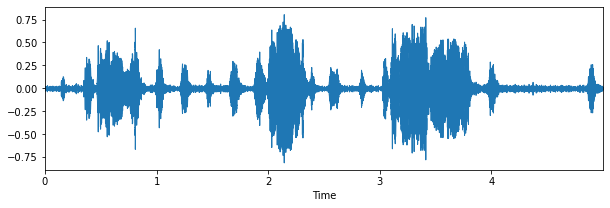

In [16]:
plt.figure(figsize=(10,3))
librosa.display.waveplot(X,samplerate)
ipd.Audio(path+clip)

### mfcc

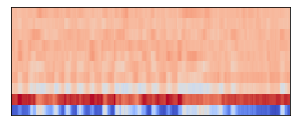

In [31]:
plt.figure(figsize=(5,2))
librosa.display.specshow(librosa.feature.mfcc(y=X,sr=samplerate,n_mfcc=10))

## melspectrogram

In [36]:
mel=librosa.feature.melspectrogram(y=X,sr=44100,n_fft=2048,hop_length=739,n_mels=299,fmin=0.0)

In [37]:
mel.shape

(299, 150)

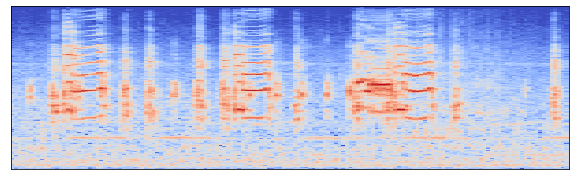

In [44]:
melpdb=librosa.power_to_db(mel)
plt.figure(figsize=(10,3))
librosa.display.specshow(melpdb)

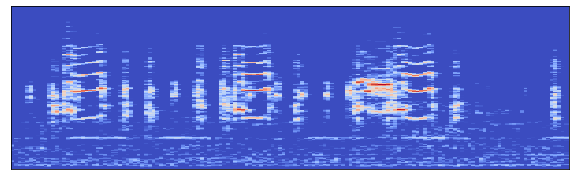

In [43]:
meladb=librosa.amplitude_to_db(mel)
plt.figure(figsize=(10,3))
librosa.display.specshow(meladb)

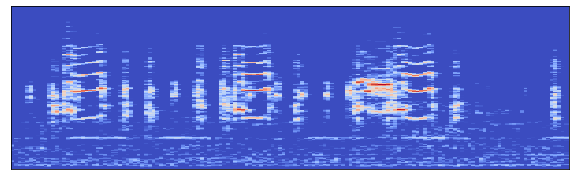

In [45]:
a=librosa.amplitude_to_db(mel, ref=1.0, amin=1e-05, top_db=80.0)
plt.figure(figsize=(10,3))
librosa.display.specshow(meladb)

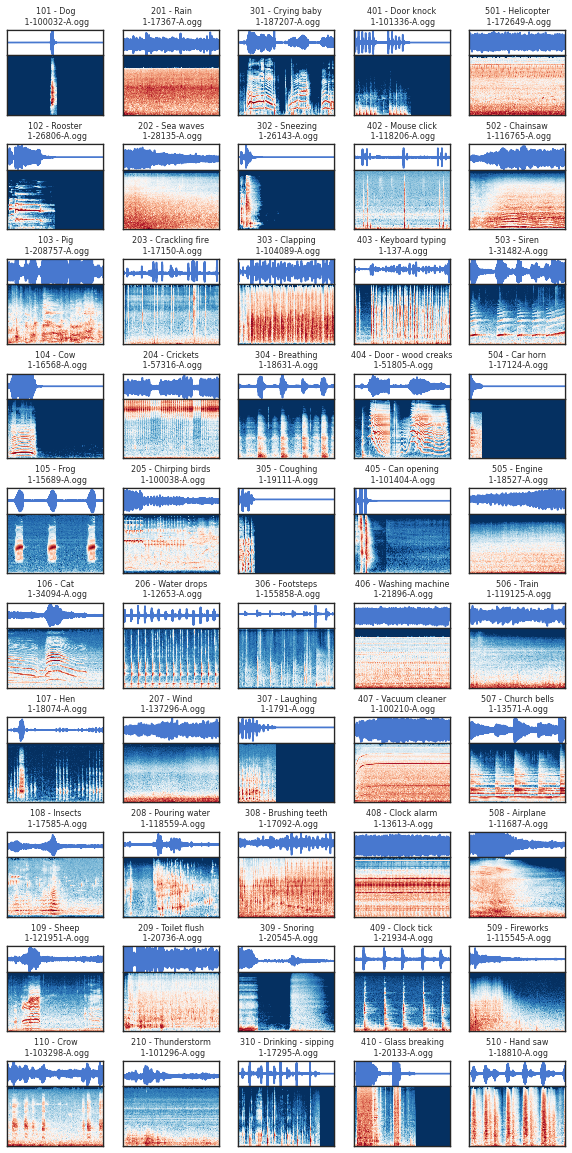

In [33]:
ipd.Image('F:\\speech recognition\\PAPERS\\download.png')

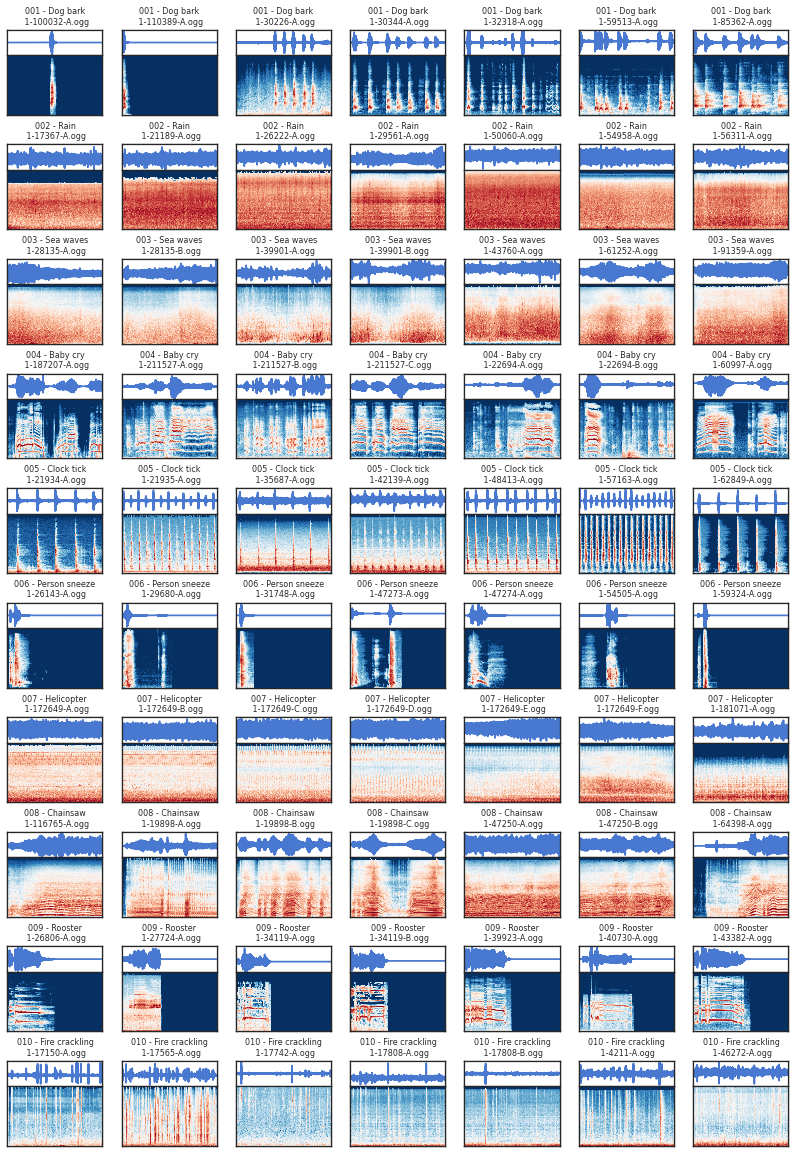

In [34]:
ipd.Image('F:\\speech recognition\\PAPERS\\download1.png')

### create images and save to local

In [97]:
 def extract_images(file,name):
    plt.interactive(False)
    clip, sample_rate = librosa.load(file, sr=None)
    fig = plt.figure(figsize=[.5,.25])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    librosa.display.specshow(librosa.amplitude_to_db(S))
    filename  = 'F:\\speech recognition\\datasets\\ESC-50-master\\ESC-50-master\\a_images\\'+name+'.jpg'
    fig.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del filename,clip,sample_rate,fig,ax,S

In [32]:
audio_path='F:\\speech recognition\\datasets\\ESC-50-master\\ESC-50-master\\audio\\'
dataframe['path']=audio_path
dataframe.tail()

,filename,fold,target,category,esc10,src_file,take,path
1995,5-263831-B-6.wav,5,6,hen,False,263831,B,F:\speech recognition\datasets\ESC-50-master\E...
1996,5-263902-A-36.wav,5,36,vacuum_cleaner,False,263902,A,F:\speech recognition\datasets\ESC-50-master\E...
1997,5-51149-A-25.wav,5,25,footsteps,False,51149,A,F:\speech recognition\datasets\ESC-50-master\E...
1998,5-61635-A-8.wav,5,8,sheep,False,61635,A,F:\speech recognition\datasets\ESC-50-master\E...
1999,5-9032-A-0.wav,5,0,dog,True,9032,A,F:\speech recognition\datasets\ESC-50-master\E...


In [99]:
files=dataframe.iloc[:,7]+dataframe.iloc[:,0]
names=dataframe['filename']

In [100]:
for file in files[:10]:
    print(file)

F:\speech recognition\datasets\ESC-50-master\ESC-50-master\audio\1-100032-A-0.wav
F:\speech recognition\datasets\ESC-50-master\ESC-50-master\audio\1-100038-A-14.wav
F:\speech recognition\datasets\ESC-50-master\ESC-50-master\audio\1-100210-A-36.wav
F:\speech recognition\datasets\ESC-50-master\ESC-50-master\audio\1-100210-B-36.wav
F:\speech recognition\datasets\ESC-50-master\ESC-50-master\audio\1-101296-A-19.wav
F:\speech recognition\datasets\ESC-50-master\ESC-50-master\audio\1-101296-B-19.wav
F:\speech recognition\datasets\ESC-50-master\ESC-50-master\audio\1-101336-A-30.wav
F:\speech recognition\datasets\ESC-50-master\ESC-50-master\audio\1-101404-A-34.wav
F:\speech recognition\datasets\ESC-50-master\ESC-50-master\audio\1-103298-A-9.wav
F:\speech recognition\datasets\ESC-50-master\ESC-50-master\audio\1-103995-A-30.wav


In [101]:
for i in tqdm(range(2000)):
    extract_images(files[i],names[i].split('.')[0])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [08:26<00:00,  3.95it/s]


##### images created

### Convert images to RGB values

In [102]:
def create_imagearray(file):
    return (img_to_array(Image.open(file)))

In [103]:
imagespath='F:\\speech recognition\\datasets\\ESC-50-master\\ESC-50-master\\a_images\\'
dataframe['imagespath']=imagespath
dataframe.tail()

,filename,fold,target,category,esc10,src_file,take,path,imagespath
1995,5-263831-B-6.wav,5,6,hen,False,263831,B,F:\speech recognition\datasets\ESC-50-master\E...,F:\speech recognition\datasets\ESC-50-master\E...
1996,5-263902-A-36.wav,5,36,vacuum_cleaner,False,263902,A,F:\speech recognition\datasets\ESC-50-master\E...,F:\speech recognition\datasets\ESC-50-master\E...
1997,5-51149-A-25.wav,5,25,footsteps,False,51149,A,F:\speech recognition\datasets\ESC-50-master\E...,F:\speech recognition\datasets\ESC-50-master\E...
1998,5-61635-A-8.wav,5,8,sheep,False,61635,A,F:\speech recognition\datasets\ESC-50-master\E...,F:\speech recognition\datasets\ESC-50-master\E...
1999,5-9032-A-0.wav,5,0,dog,True,9032,A,F:\speech recognition\datasets\ESC-50-master\E...,F:\speech recognition\datasets\ESC-50-master\E...


In [104]:
files=dataframe.iloc[:,8]+dataframe.iloc[:,0]
xtrain=[]
for file in tqdm(files):
    xtrain.append(create_imagearray(file[:-3]+'jpg'))


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:08<00:00, 226.12it/s]


In [105]:
len(xtrain)

2000

In [106]:
Xtrain=np.array(xtrain)

In [107]:
Xtrain.shape

(2000, 75, 155, 3)

In [108]:
ytrain=dataframe['target']

In [109]:
len(ytrain)

2000

In [110]:
encoder=LabelEncoder()
Ytrain=np_utils.to_categorical(encoder.fit_transform(ytrain))

In [115]:
label_count=Ytrain.shape[1]
label_count

50

##### save numpy arrays to local

In [112]:
np.save('Xtrain_esc50',Xtrain)
np.save('Ytrain_esc50',Ytrain)

upload npy files to drive to access in colab notebook

In [120]:
def return_model():
    #create model
    model=Sequential()
    #add convolutional input layer,32 feature maps with a size of 3*3 
    model.add(Convolution2D(32,(3,3),input_shape=(75,155,3),activation='relu'))
    #Dropout 20%
    model.add(Dropout(0.2))
    #add convolutional layer,32 feature maps with a size of 3*3
    model.add(Convolution2D(32,(3,3),activation='relu'))
    #add maxpooling layer with size 2*2
    model.add(MaxPooling2D(pool_size=(2,2)))
    #add convolutional layer,64 feature maps with a size of 3*3
    model.add(Convolution2D(64,(3,3),activation='relu'))
    #add maxpooling layer with size 2*2
    model.add(MaxPooling2D(pool_size=(2,2)))
    #add convolutional layer,128 feature maps with a size of 3*3
    model.add(Convolution2D(128,(3,3),activation='relu'))
    #add maxpooling layer with size 2*2
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(128,activation='relu',W_constraint=maxnorm(3)))
    model.add(Dropout(0.5))
    model.add(Dense(256,activation='relu',W_constraint=maxnorm(3)))
    model.add(Dropout(0.6))
    model.add(Dense(label_count,activation='softmax'))
    ###compile model
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [121]:
model=return_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 73, 153, 32)       896       
_________________________________________________________________
dropout_13 (Dropout)         (None, 73, 153, 32)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 71, 151, 32)       9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 35, 75, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 33, 73, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 36, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 34, 128)      

C:\Users\LENOVO\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", kernel_constraint=<keras.con...)`
C:\Users\LENOVO\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, activation="relu", kernel_constraint=<keras.con...)`


In [122]:
from sklearn.utils import shuffle
Xtrain,Ytrain=shuffle(Xtrain,Ytrain)

In [124]:
model.fit(x=Xtrain[:1650],y=Ytrain[:1650],validation_data=(Xtrain[1650:],Ytrain[1650:]),epochs=40)

Train on 1650 samples, validate on 350 samples
Epoch 1/40
1650/1650 [==============================] - 53s 32ms/step - loss: 3.4543 - accuracy: 0.1194 - val_loss: 3.5169 - val_accuracy: 0.1114
Epoch 2/40
1650/1650 [==============================] - 53s 32ms/step - loss: 3.3660 - accuracy: 0.1291 - val_loss: 3.4541 - val_accuracy: 0.1029
Epoch 3/40
1650/1650 [==============================] - 54s 33ms/step - loss: 3.3219 - accuracy: 0.1382 - val_loss: 3.4519 - val_accuracy: 0.1114
Epoch 4/40
1650/1650 [==============================] - 54s 33ms/step - loss: 3.2318 - accuracy: 0.1606 - val_loss: 3.3747 - val_accuracy: 0.1114
Epoch 5/40
1650/1650 [==============================] - 54s 33ms/step - loss: 3.1785 - accuracy: 0.1758 - val_loss: 3.3583 - val_accuracy: 0.1314
Epoch 6/40
1650/1650 [==============================] - 54s 32ms/step - loss: 3.1338 - accuracy: 0.1885 - val_loss: 3.4839 - val_accuracy: 0.1171
Epoch 7/40
1650/1650 [==============================] - 53s 32ms/step - loss:

In [125]:
model.fit(x=Xtrain[:1650],y=Ytrain[:1650],validation_data=(Xtrain[1650:],Ytrain[1650:]),epochs=40)

Train on 1650 samples, validate on 350 samples
Epoch 1/40
1650/1650 [==============================] - 52s 32ms/step - loss: 1.0980 - accuracy: 0.6885 - val_loss: 2.4572 - val_accuracy: 0.3657
Epoch 2/40
1650/1650 [==============================] - 51s 31ms/step - loss: 0.9301 - accuracy: 0.7224 - val_loss: 2.4962 - val_accuracy: 0.3514
Epoch 3/40
1650/1650 [==============================] - 54s 33ms/step - loss: 0.9185 - accuracy: 0.7164 - val_loss: 2.4946 - val_accuracy: 0.3600
Epoch 4/40
1650/1650 [==============================] - 52s 32ms/step - loss: 0.9435 - accuracy: 0.7182 - val_loss: 2.5393 - val_accuracy: 0.3371
Epoch 5/40
1650/1650 [==============================] - 54s 32ms/step - loss: 0.8889 - accuracy: 0.7352 - val_loss: 2.6066 - val_accuracy: 0.3229
Epoch 6/40
1650/1650 [==============================] - 55s 34ms/step - loss: 0.8496 - accuracy: 0.7600 - val_loss: 2.4270 - val_accuracy: 0.3429
Epoch 7/40
1650/1650 [==============================] - 55s 33ms/step - loss:

KeyboardInterrupt: 

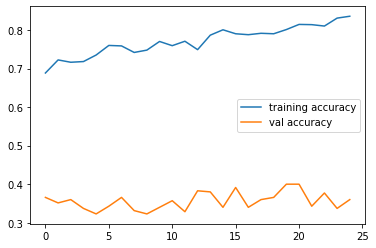

In [126]:
training_data=model.history.history
plt.plot(training_data['accuracy'],label='training accuracy')
plt.plot(training_data['val_accuracy'],label='val accuracy')
plt.legend(loc='best')